In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
url = 'https://raw.githubusercontent.com/anushishah/heart_disease_UCI/refs/heads/main/heart_disease_UCI.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



**Exploratory data analysis (EDA)**
* Number of records/rows and features.
* Number of uniques values in each features.
* Check missing values in each feature.
* Check duplicated values.
* Names and number of categorical and numerical features.
* Count of positive and negative target samples.
* Summary statistics
* Correlation heatmap between independent variables.
* Sex distribution
* Bar plot for categorical variables coloured by target variable (HeartDisease).
* Histogram and box plots for for distribution of numerical features coloured by target variable (HeartDisease).
* Pairplot to investigate relationship between all numerical features.


In [3]:
# Shape of data
df.shape

(918, 12)

In [4]:
# Number of unique values
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [5]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
# Check for duplicated values
df.duplicated().sum()


np.int64(0)

In [7]:
# Check for numerical features in the dataset
features_numerical = df.select_dtypes(include=['int64', 'float64'])
features_numerical


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [8]:
# Check for numerical and categorical features in the dataset

features_categorical = df.select_dtypes(include=['object'])
features_categorical

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [9]:
# Here, HeartDisease is the target variable with 0 and 1 values.
# Obtain counts for target variable.

df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [10]:
pd.crosstab(df.HeartDisease, df.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [11]:
# Subset dataset

df_normal = df[df['HeartDisease']==0]
df_heart = df[df['HeartDisease']==1]

In [12]:
# Summary statistics for heart disease people
df_heart.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [13]:
# Summary statistics for normal people
df_normal.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
std,9.444915,16.499585,74.634659,0.309894,23.288067,0.699709,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.250000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,266.750000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


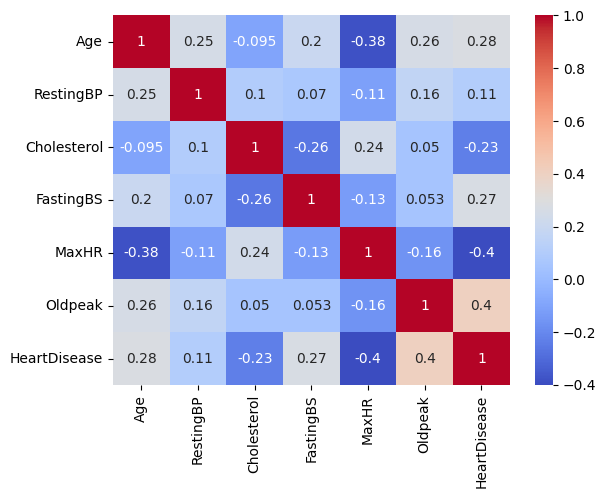

In [14]:
# Check correlation between numerical features
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

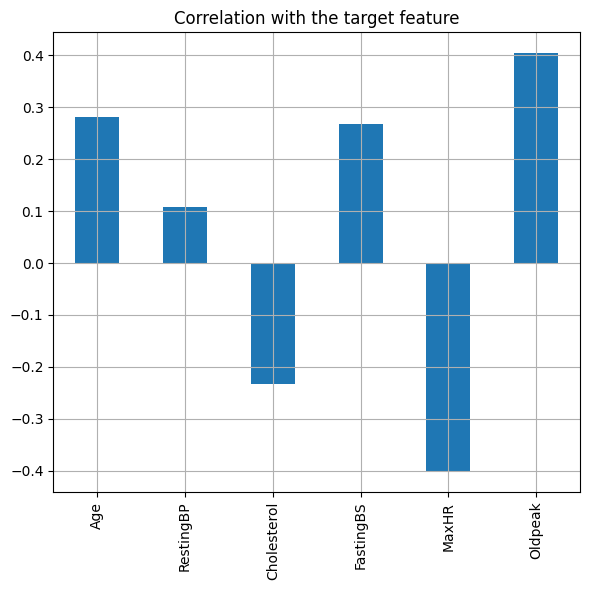

In [15]:
df.select_dtypes(include=np.number).drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(6, 6), title="Correlation with the target feature")
plt.tight_layout()

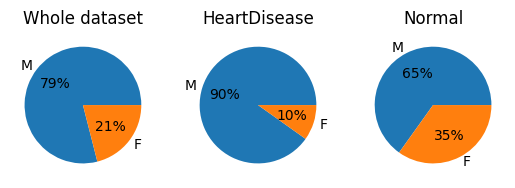

In [16]:
# Sex distrubution

plt.subplot(1,3,1)
plt.pie(df['Sex'].value_counts(),labels=['M','F'],autopct='%.0f%%')
plt.title('Whole dataset')

plt.subplot(1,3,2)
plt.pie(df_heart['Sex'].value_counts(),labels=['M','F'],autopct='%.0f%%')
plt.title('HeartDisease')

plt.subplot(1,3,3)
plt.pie(df_normal['Sex'].value_counts(),labels=['M','F'],autopct='%.0f%%')
plt.title('Normal')

plt.show()

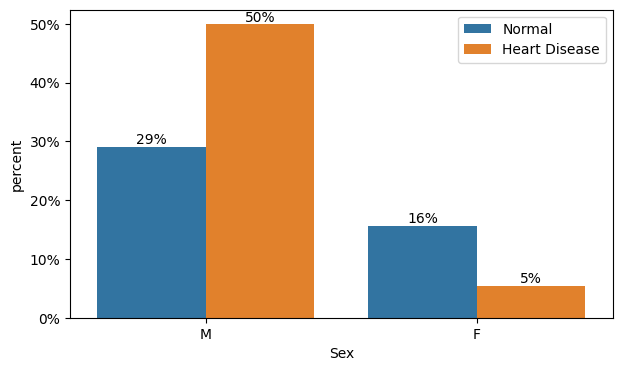

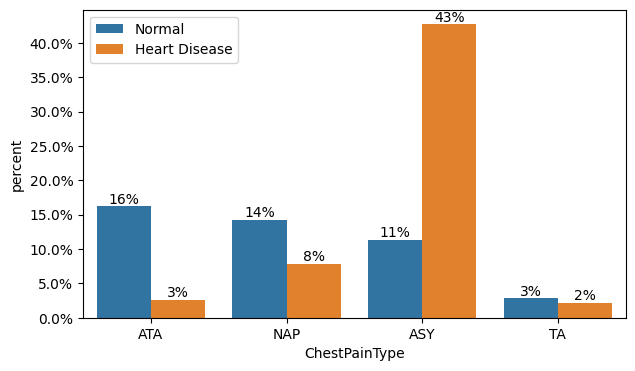

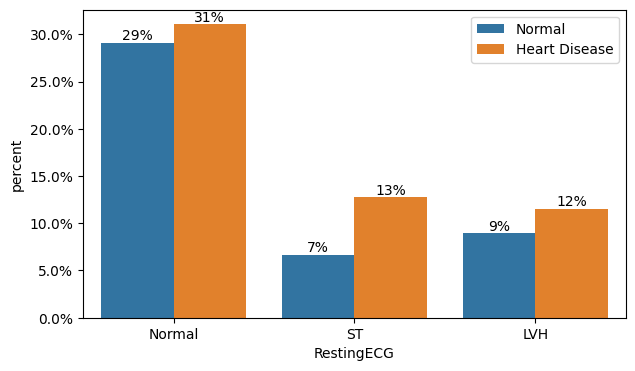

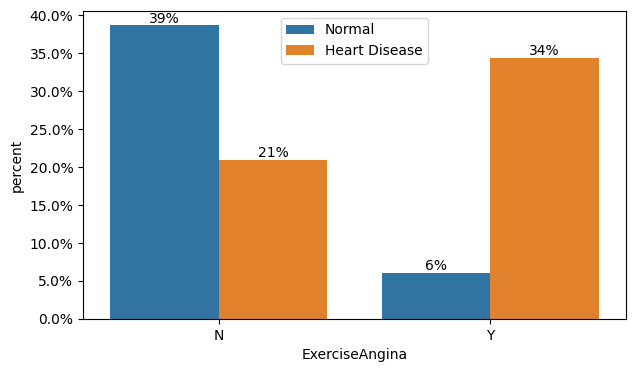

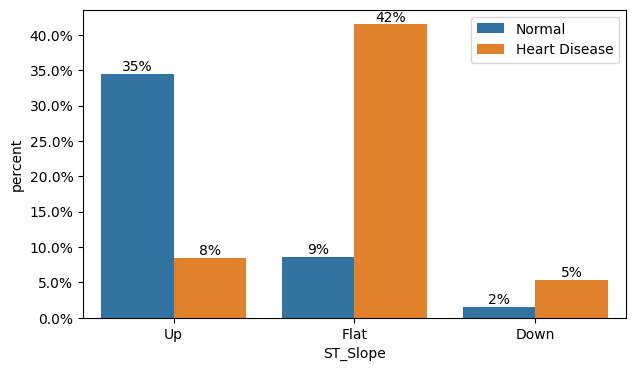

In [17]:
for i in features_categorical:
    fig, axes = plt.subplots(1, 1, figsize=(7, 4))
    axes.yaxis.set_major_formatter(ticker.PercentFormatter())
    sns.countplot(x=i, data=df, hue='HeartDisease',legend=False,stat='percent')

    for container in axes.containers:
      axes.bar_label(container, fmt='%.0f%%',label_type='edge')

    plt.legend(['Normal', 'Heart Disease'])
    #plt.title(i)
    plt.show()

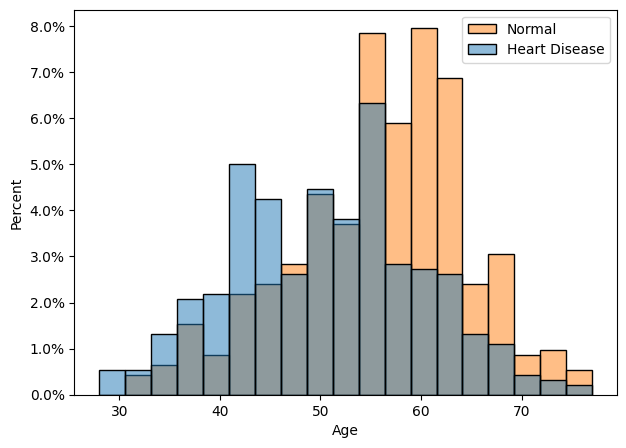

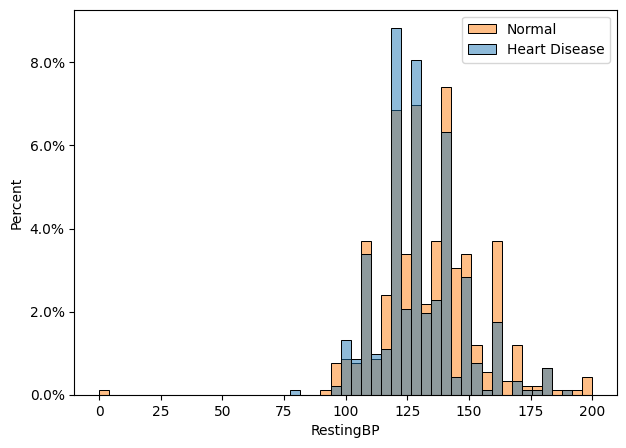

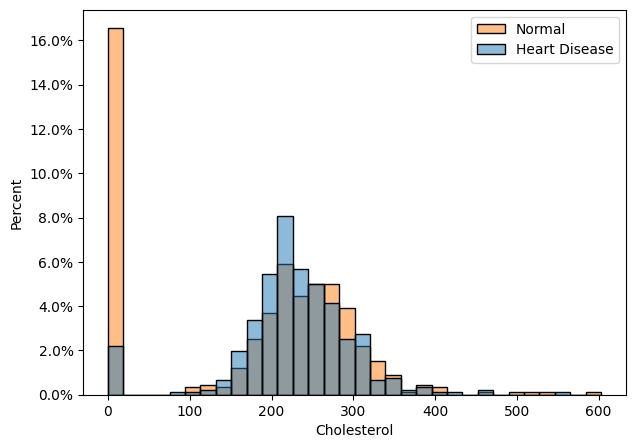

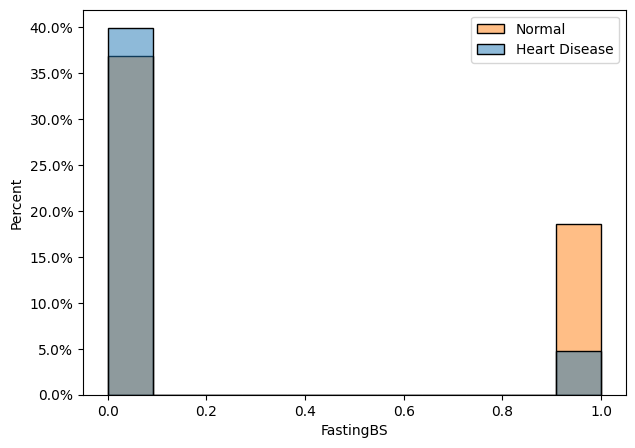

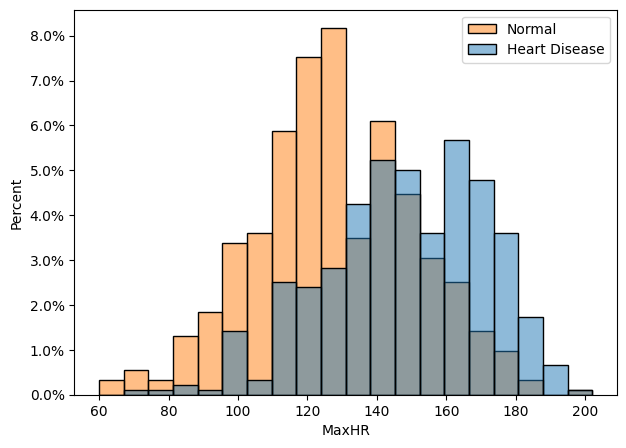

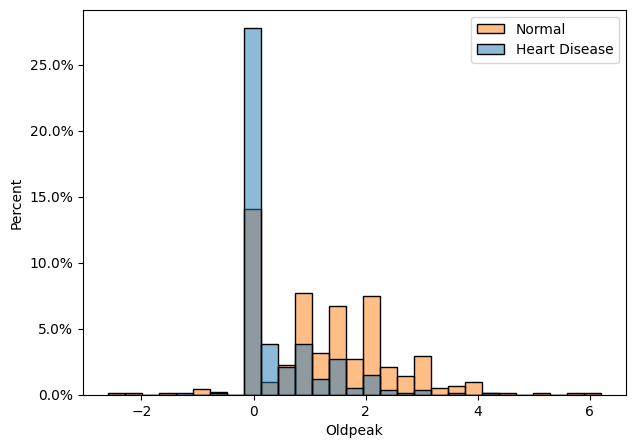

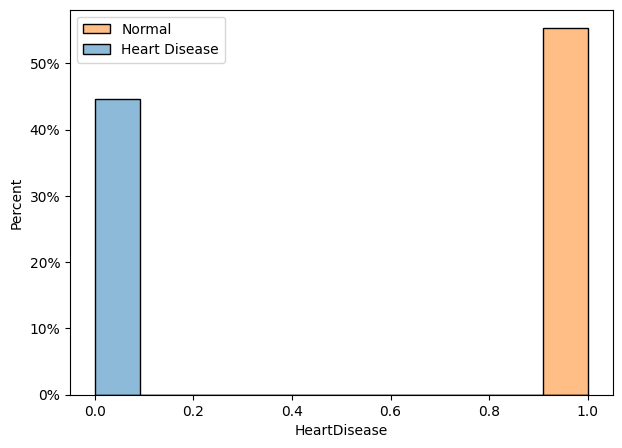

In [18]:
for i in features_numerical:
    fig, axes = plt.subplots(1, 1, figsize=(7, 5))
    axes.yaxis.set_major_formatter(ticker.PercentFormatter())
    sns.histplot(x=i, data=df, hue='HeartDisease', legend=False,stat='percent')
    plt.legend(['Normal', 'Heart Disease'])
    #plt.title(i)
    plt.show()

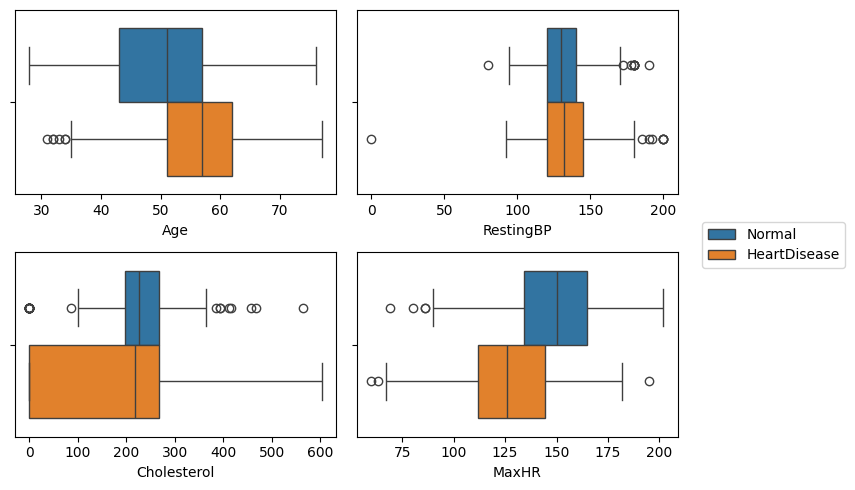

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(7,5))
labels = ['Normal', 'HeartDisease']

sns.boxplot(x='Age', data=df, hue='HeartDisease', ax=axes[0,0],legend=False)
sns.boxplot(x='RestingBP', data=df, hue='HeartDisease',ax=axes[0,1], legend=False)
sns.boxplot(x='Cholesterol', data=df, hue='HeartDisease',ax=axes[1,0], legend=False)
sns.boxplot(x='MaxHR', data=df, hue='HeartDisease',ax=axes[1,1], legend=False)

fig.legend(loc="center left",bbox_to_anchor=(1.0, 0.5),labels=labels)

plt.tight_layout()
plt.show()

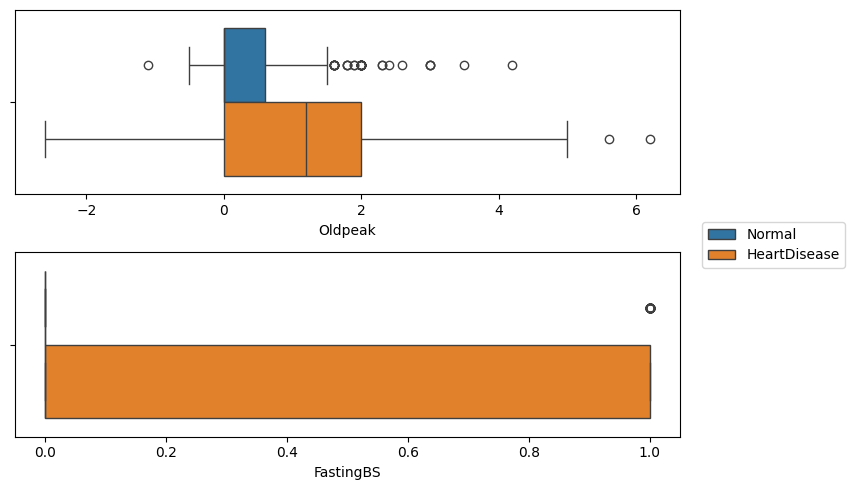

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(7,5))
labels = ['Normal', 'HeartDisease']

sns.boxplot(x='Oldpeak', data=df, hue='HeartDisease', ax=axes[0],legend=False)
sns.boxplot(x='FastingBS', data=df, hue='HeartDisease',ax=axes[1], legend=False)

fig.legend(loc="center left",bbox_to_anchor=(1.0, 0.5),labels=labels)

plt.tight_layout()
plt.show()

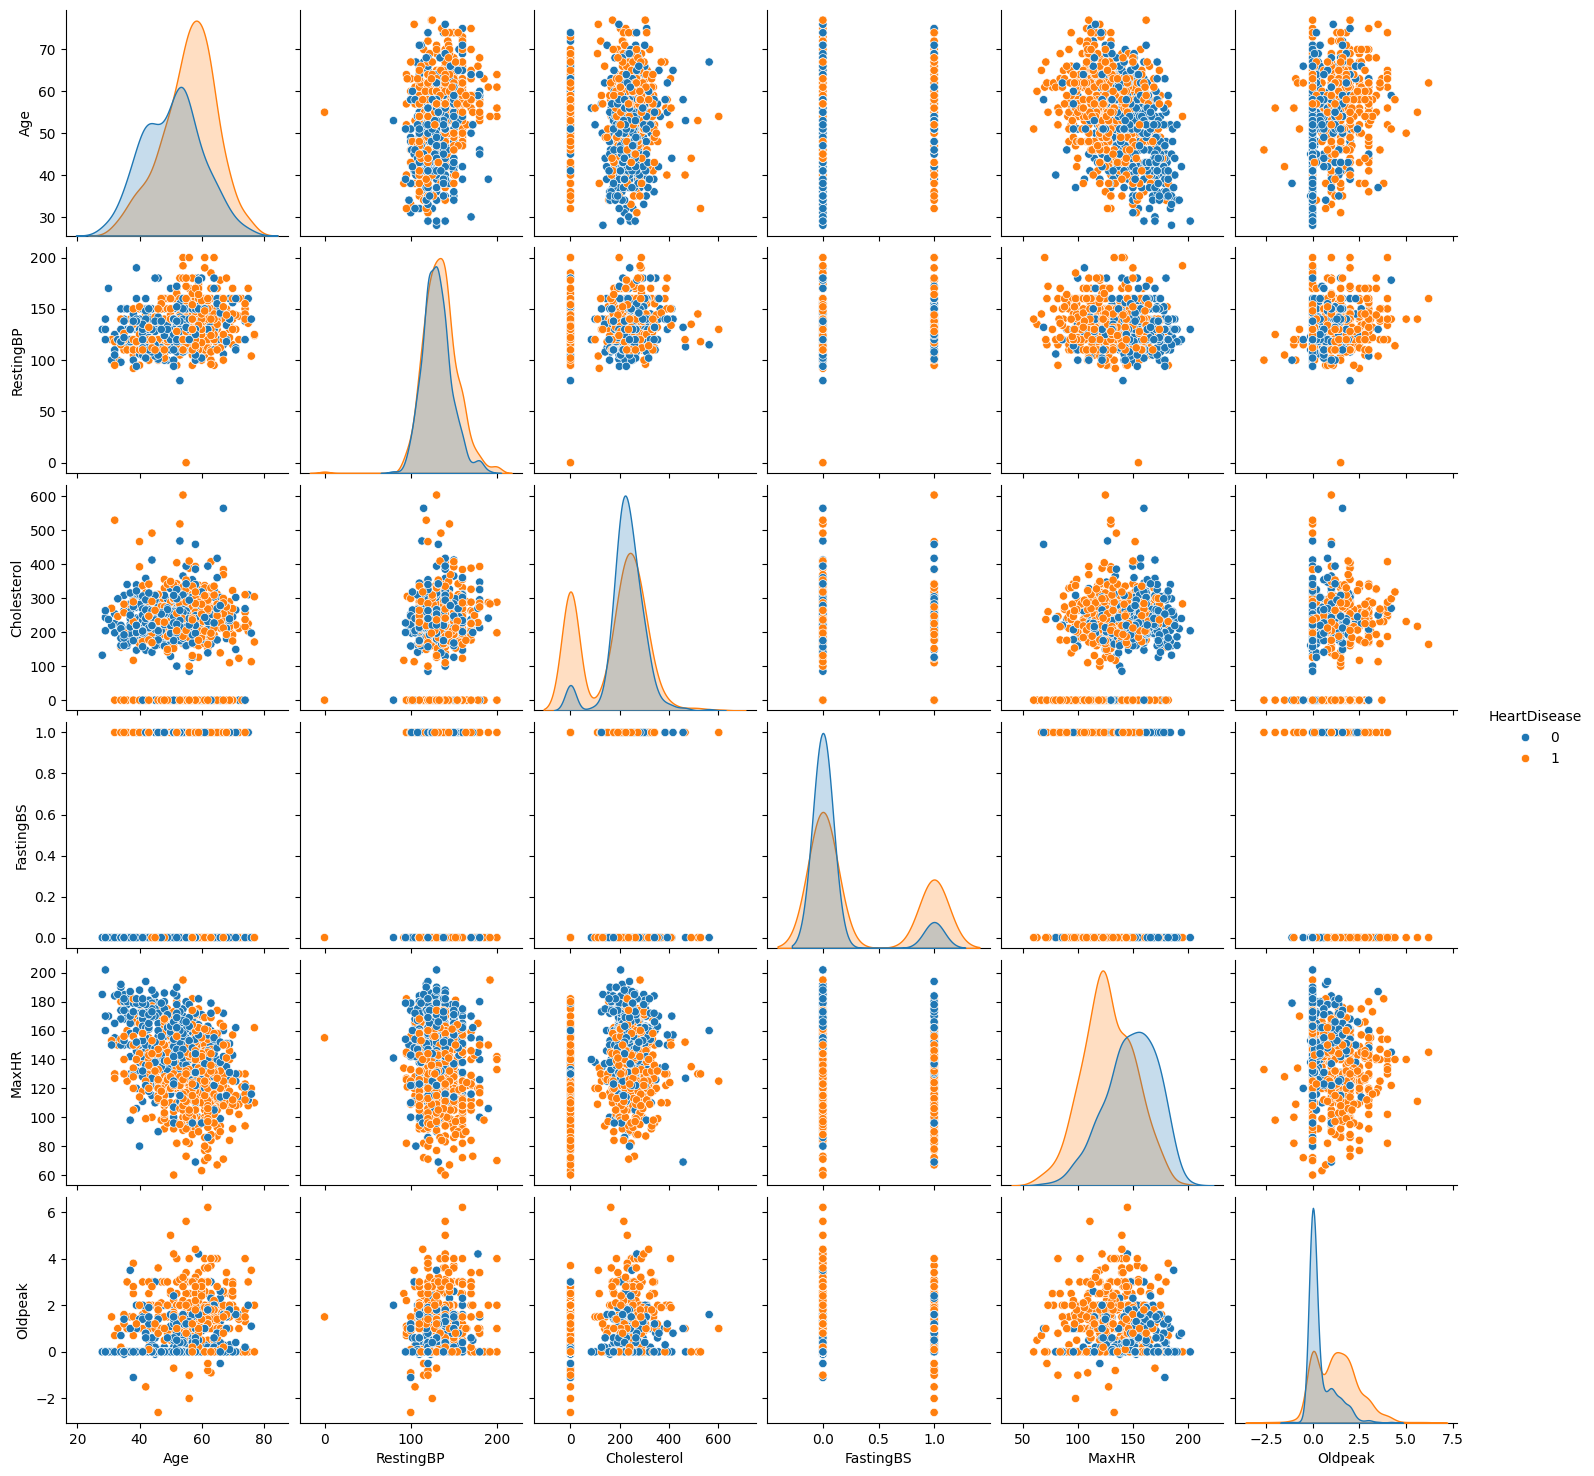

In [21]:
# pairplot
sns.pairplot(df, hue='HeartDisease')
plt.show()

**Summary Insights**

* The dataset contains 918 observations with 508 positive samples (presence of heart disease) and 410 negative samples (absence of heart disease). It is slightly imbalanced dataset.
* 6 independent numerical features: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak
* 5 independent categorical features: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

* 1 dependent categorical target variable: HeartDisease

* There are no missing values and no duplicates. Data is clean and ready for analysis.
* Significantly higher proportion of males (79%) in the dataset, indicating gender imbalance in the dataset.
* For heart disease patients:
* Typical age distribution between 50 and 65 years with few outliers less than 35 years. The risk increases with age.
* Majority of heart patients are males (90.2%).
* Exercise induced angina has huge impact on heart disease patients (34%).
* ASY (Asymptomatic) chest pain type is most common in these patients (43%). Typical Angina (TA) and Atypical angina (ATA) chest pain types have lower occurrences.
* Have lower exercise induced maximum heart rate.
* Higher fasting blood sugar.
* Moderate positive (0.4) with oldpeak (ST segment depression after exercise).
* Moderate negative correlation (-0.4) with exercise induced maximum heart rate.

